# Nonlinear Least-Squares

## Imports

In [1]:
import numpy as np
from numpy.random import normal, uniform

In [2]:
import scipy as sp

In [3]:
import pandas as pd

In [4]:
import sympy as sy

In [5]:
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.patches import Ellipse

In [6]:
import lmfit

In [7]:
import plotly.express as px
import plotly.graph_objects as go

## Preamble

In [8]:
plt.rc('font',   size=16)          # controls default text sizes
plt.rc('axes',   titlesize=18)     # fontsize of the axes title
plt.rc('axes',   labelsize=18)     # fontsize of the x and y labels
plt.rc('xtick',  labelsize=18)     # fontsize of the tick labels
plt.rc('ytick',  labelsize=18)     # fontsize of the tick labels
plt.rc('legend', fontsize=18)      # legend fontsize
plt.rc('figure', titlesize=18)     # fontsize of the figure title

## Example 1

### The datasets

We have two synthetic datasets: (x1,y1) and (x2,y2). 

In [9]:
x1 = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
y1 = np.array([0.0638, 0.1870, 0.2495, 0.3207, 0.3356, 0.5040, 0.5030, 0.6421, 0.6412, 0.5678])

x2 = np.array([0.1, 0.6, 1.1, 1.6, 2.1, 2.6, 3.1, 3.6, 4.1, 4.6])
y2 = np.array([0.0638, 0.4569, 0.6574, 0.7891, 0.8197, 0.9786, 0.9545, 1.0461, 1.0312, 0.9256])

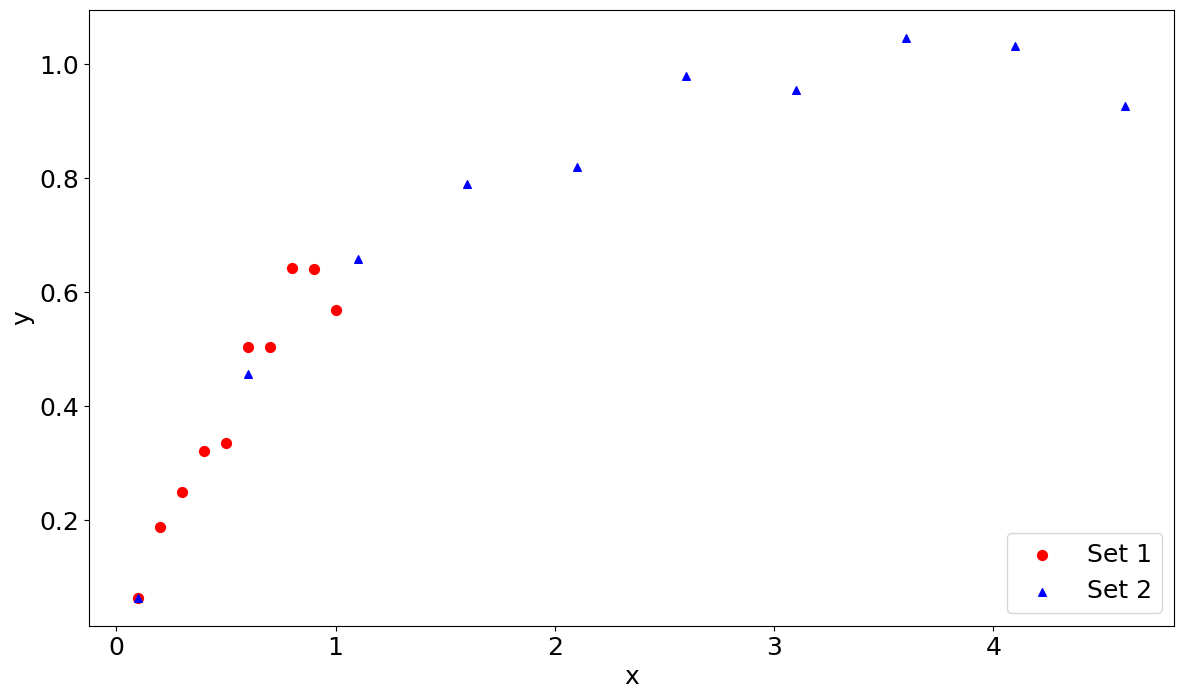

In [10]:
matplotlib.rcParams['text.usetex'] = False
fig, ax = plt.subplots(1,1, figsize=(14,8))
plt.scatter(x1, y1, c="red", marker='o', s=50, label="Set 1")
plt.scatter(x2, y2, c="blue", marker='^', s=30, label="Set 2")
ax.set_xlabel('x')
ax.set_ylabel('y') 
ax.legend(loc=4)
plt.show()

### Set up the nonlinear model

The model we want to fit is 
$$ y = \theta_1  (1-e^{-\theta_2 x})  $$ 

In [11]:
def myFunc(x, theta1, theta2):
    return theta1 * (1-np.exp(-theta2*x))

In [12]:
myModel = lmfit.Model(myFunc)

`lmfit` requires initial guesses (for which we take $\theta_1 = \theta_2 = 0.5$), and allows for constraints. For both parameters we set the lower boundary to zero.

In [13]:
myModel.set_param_hint('theta1', value=0.5, min=0.0)
myModel.set_param_hint('theta2', value=0.5, min=0.0)

### Fit dataset 1

See the [LMFIT documentation](https://lmfit.github.io/lmfit-py/fitting.html) for more info on the available minimization routines. Default is the Levenberg-Marquardt method. Note that the `fit()` function also accepts a `weights` argument. **Be careful**, however, for lmfit the weights $w_n$ are defined by $w_n = 1/\sigma_n$ and not by $1/\sigma^2_n$ as in the statsmodels library.

In [14]:
myFit1 = myModel.fit(y1, x=x1)

In [15]:
print(myFit1.success)                 # Did we converge?

True


lmfit provides a few reports:

In [16]:
print(myFit1.fit_report())

[[Model]]
    Model(myFunc)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 29
    # data points      = 10
    # variables        = 2
    chi-square         = 0.02145616
    reduced chi-square = 0.00268202
    Akaike info crit   = -57.4432861
    Bayesian info crit = -56.8381159
    R-squared          = 0.94003906
[[Variables]]
    theta1:  1.08450748 +/- 0.36005517 (33.20%) (init = 0.5)
    theta2:  0.91052219 +/- 0.42904357 (47.12%) (init = 0.5)
[[Correlations]] (unreported correlations are < 0.100)
    C(theta1, theta2) = -0.994


In [17]:
print(myFit1.ci_report(sigmas=[1,2,3], with_offset=False))

           99.73%    95.45%    68.27%    _BEST_    68.27%    95.45%    99.73%
 theta1:   0.54387   0.67160   0.82993   1.08451   1.74536  53.05833       inf
 theta2:   0.00000   0.01343   0.48991   0.91052   1.36807   1.99520   3.13393


/Users/joris/miniconda3/envs/course/lib/python3.9/site-packages/lmfit/confidence.py:330: UserWarning: rel_change=9.985167787651582e-06 < 1e-05 at iteration 200 and prob(theta1=73.09554238262606) = 0.9552342049787916 < max(sigmas)
  warn(errmsg)


The 68.27%, 95.45%, and 99.73% values come from 1-$\sigma$, 2-$\sigma$, and 3-$\sigma$ of a Gaussian distribution.

The best fit parameters, their standard errors, and their confidence intervals can be extracted with:

In [18]:
myFit1.best_values

{'theta1': 1.0845074818889264, 'theta2': 0.9105221907612153}

In [19]:
np.sqrt(myFit1.covar.diagonal())          # standard errors

array([0.36005517, 0.42904357])

In [20]:
myFit1.conf_interval(sigmas=[1,2,3])

{'theta1': [(0.9973002039367398, 0.5438675475615395),
  (0.9544997361036416, 0.6716015967557369),
  (0.6826894921370859, 0.8299286596174174),
  (0.0, 1.0845074818889264),
  (0.6826894921370859, 1.7453558200684913),
  (0.9544997361036416, 53.058329141294564),
  (0.9973002039367398, inf)],
 'theta2': [(0.9973002039367398, 1.995093493066637e-10),
  (0.9544997361036416, 0.013426503124760906),
  (0.6826894921370859, 0.4899142599800461),
  (0.0, 0.9105221907612153),
  (0.6826894921370859, 1.3680716476726662),
  (0.9544997361036416, 1.995198493685156),
  (0.9973002039367398, 3.133928299532653)]}

The fitted response values and the corresponding residuals can be extracted with:

In [21]:
myFit1.best_fit

array([0.09438465, 0.180555  , 0.25922596, 0.33105018, 0.39662354,
       0.45649006, 0.51114639, 0.56104599, 0.60660282, 0.64819485])

In [22]:
myFit1.residual

array([ 0.03058465, -0.006445  ,  0.00972596,  0.01035018,  0.06102354,
       -0.04750994,  0.00814639, -0.08105401, -0.03459718,  0.08039485])

The AIC, BIC, and the $\chi^2$ function are obtained with

In [23]:
myFit1.aic, myFit1.bic

(-57.44328612600294, -56.838115940014845)

In [24]:
myFit1.chisqr

0.02145615947953406

### Fit dataset 2

In [25]:
myFit2 = myModel.fit(y2, x=x2)

In [26]:
print(myFit2.fit_report())

[[Model]]
    Model(myFunc)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 19
    # data points      = 10
    # variables        = 2
    chi-square         = 0.01814478
    reduced chi-square = 0.00226810
    Akaike info crit   = -59.1195725
    Bayesian info crit = -58.5144024
    R-squared          = 0.97886291
[[Variables]]
    theta1:  1.01922577 +/- 0.03048104 (2.99%) (init = 0.5)
    theta2:  0.94043470 +/- 0.09931917 (10.56%) (init = 0.5)
[[Correlations]] (unreported correlations are < 0.100)
    C(theta1, theta2) = -0.792


### Show the fits in a plot

In [27]:
z = np.linspace(0.0, 4.8, 100)

In [28]:
initYvalues = myModel.eval(x=z, params=myFit1.init_params)
fitYvalues1 = myModel.eval(x=z, params=myFit1.params)
fitYvalues2 = myModel.eval(x=z, params=myFit2.params)

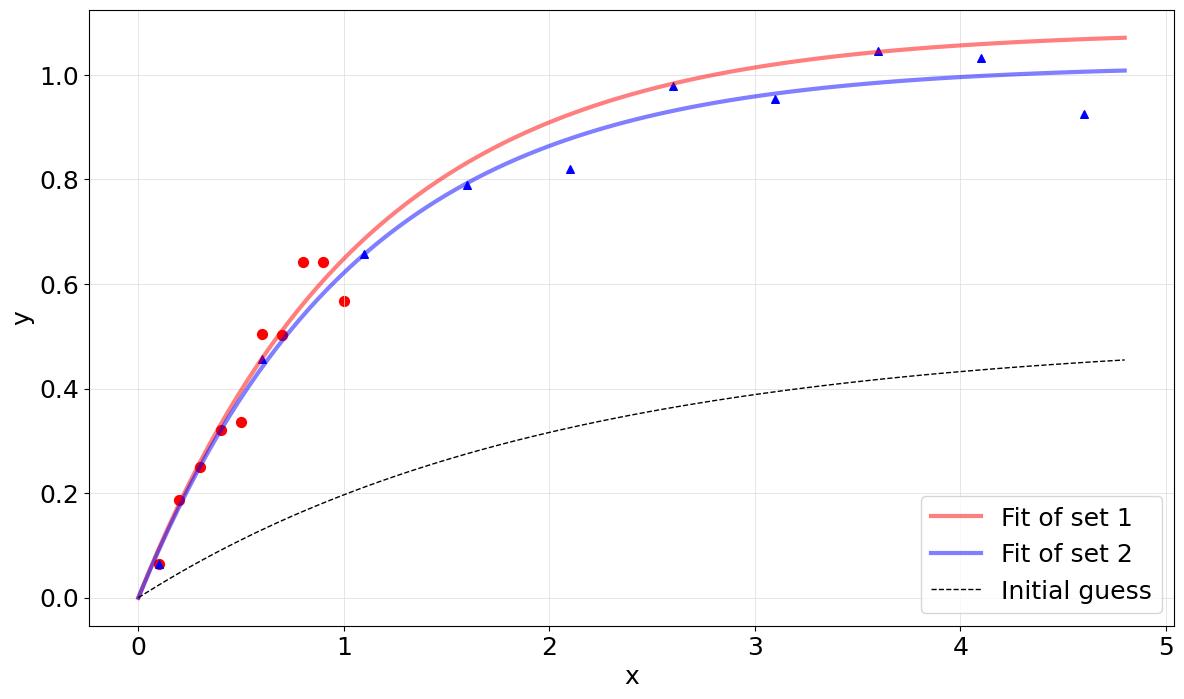

In [29]:
fig, ax = plt.subplots(1,1, figsize=(14,8))
plt.scatter(x1, y1, c="red", marker='o', s=50)
plt.scatter(x2, y2, c="blue", marker='^', s=30)
ax.plot(z, fitYvalues1, color="red", linewidth=3, alpha=0.5, label="Fit of set 1")
ax.plot(z, fitYvalues2, color="blue", linewidth=3, alpha=0.5, label="Fit of set 2")
ax.plot(z, initYvalues, color="black", linewidth=1, linestyle="dashed", label="Initial guess")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.grid(True, color='gainsboro', linestyle='-', linewidth=0.5)
ax.legend(loc=4)
plt.show()

### Confidence region for dataset 1

We first define the cost function 
$$ S(\theta_1, \theta_2) = \sum_{n=1}^N (y_n - \theta_1 (1-e^{-\theta_2 x}))^2 $$

In [30]:
def S1(theta1, theta2):
    cost = 0.0
    for n in range(len(x1)):
        cost += (y1[n] - theta1 * (1-np.exp(-theta2*x1[n])))**2
    return cost

The fit parameters are estimating by minimizing this cost function. The minimum value that was found is $S(\hat{\theta}_1, \hat{\theta}_2)$.

In [31]:
bestTheta1 = myFit1.best_values['theta1']
bestTheta2 = myFit1.best_values['theta2']
bestS1 = S1(bestTheta1, bestTheta2) 
print("Minimum of the cost function: ", bestS1)

Minimum of the cost function:  0.02145615947953406


The 95% confidence region can be estimated by computing the value of the contour of $(\theta_1, \theta_2)$ that encompasses this region:

In [32]:
N = len(x1)
K = 2
Fdistrib = sp.stats.f(K, N-K)
contourLevel95 = bestS1 * (1+K/(N-K)*Fdistrib.ppf(1-0.05))
print("Contour level of the 95% confidence region: ", contourLevel95)

Contour level of the 95% confidence region:  0.04537425291491432


Show the minimum, the contours and the confidence region in a plot. To draw the contours, we first need to evaluate $S(\theta_1, \theta_2)$ in a dense grid.

In [33]:
theta1 = np.linspace(0.0, 8.0, 500)
theta2 = np.linspace(0.0, 3.0, 500)
Theta1, Theta2 = np.meshgrid(theta1, theta2)
z1 = S1(Theta1, Theta2)

This allows to make the following plot:

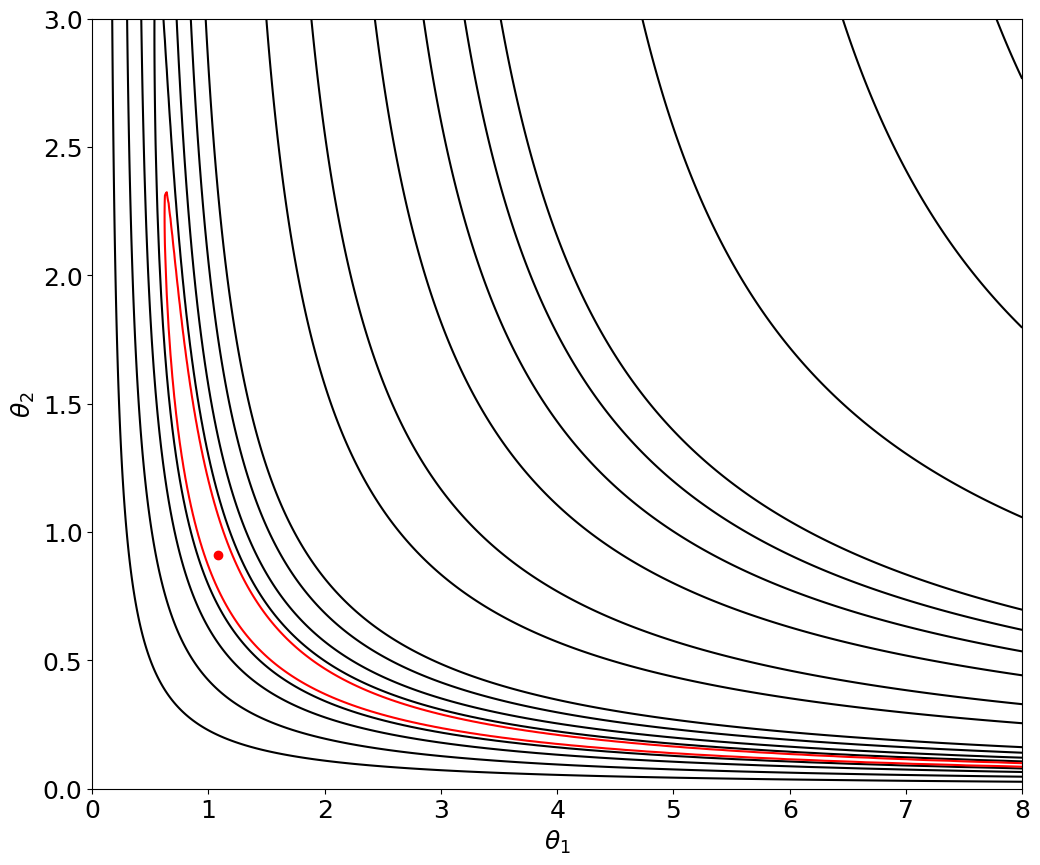

In [34]:
fig, ax = plt.subplots(1,1, figsize=(12,10))

levels = [0.075, 0.2, 0.5, 1., 5., 10, 20, 30, 40, 50, 100, 200, 300]
contours = ax.contour(Theta1, Theta2, z1, levels=levels, colors="black")
contours = ax.contour(Theta1, Theta2, z1, levels=[contourLevel95], colors="red")

ax.scatter([bestTheta1], [bestTheta2], c="red")

ax.tick_params(axis='both', which='major')
ax.set_xlabel(r'$\theta_1$')
ax.set_ylabel(r'$\theta_2$')
plt.show()

This plot explains the huge confidence interval for $\theta_1$ given by `myFit1.ci_report()` despite the fact that the standard errors are rather OK. The nonlinear model is far from the asymptotic regime where a linearization around the global minimum is reasonable.

### Confidence region for Dataset 2

In [35]:
def S2(theta1, theta2):
    cost = 0.0
    for n in range(len(x2)):
        cost += (y2[n] - theta1 * (1-np.exp(-theta2*x2[n])))**2
    return cost

In [36]:
bestTheta1 = myFit2.best_values['theta1']
bestTheta2 = myFit2.best_values['theta2']
bestS2 = S2(bestTheta1, bestTheta2)

In [37]:
N = len(x2)
K = 2
Fdistrib = sp.stats.f(K, N-K)
contourLevel95 = bestS2 * (1+K/(N-K)*Fdistrib.ppf(1-0.05))

In [38]:
theta1 = np.linspace(0.0, 8.0, 500)
theta2 = np.linspace(0.0, 3.0, 500)
Theta1, Theta2 = np.meshgrid(theta1, theta2)
z2 = S2(Theta1, Theta2)

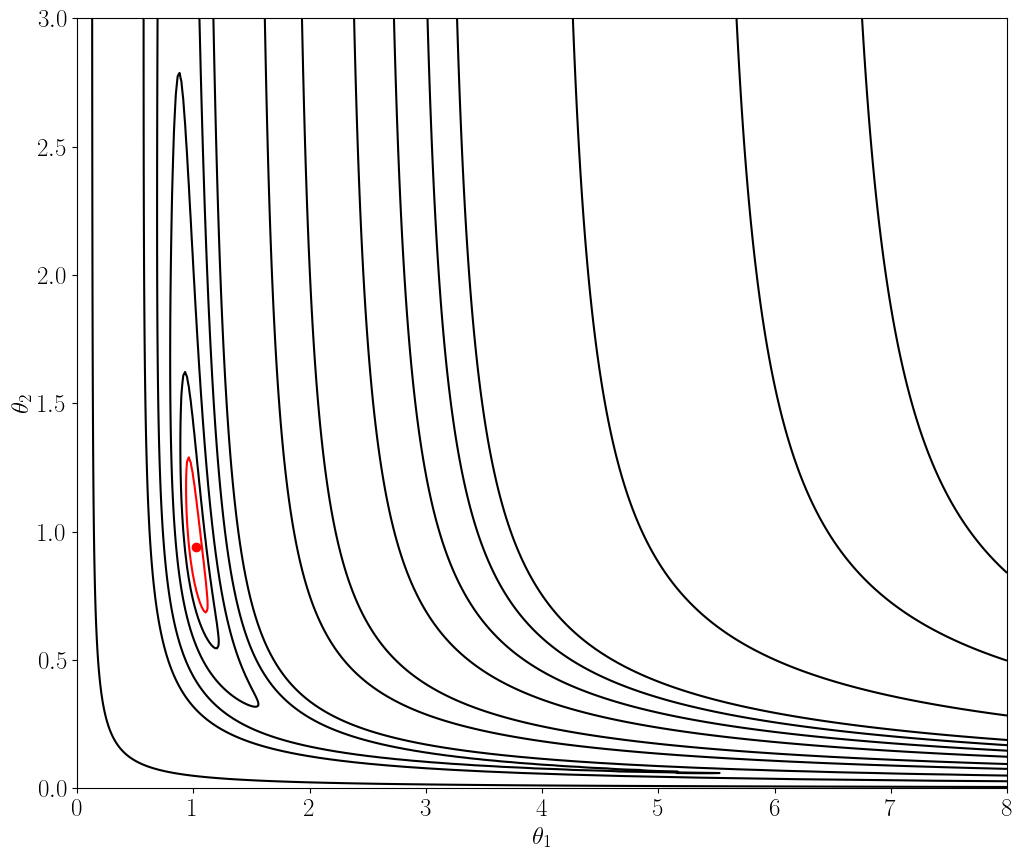

In [39]:
matplotlib.rcParams['text.usetex'] = True
fig, ax = plt.subplots(1,1, figsize=(12,10))

levels = [0.075, 0.2, 0.5, 1., 5., 10, 20, 30, 40, 50, 100, 200, 300]
contours = ax.contour(Theta1, Theta2, z2, levels=levels, colors="black")
contours = ax.contour(Theta1, Theta2, z2, levels=[contourLevel95], colors="red")

ax.scatter([bestTheta1], [bestTheta2], c="red")

ax.tick_params(axis='both', which='major')
ax.set_xlabel(r'$\theta_1$')
ax.set_ylabel(r'$\theta_2$')
plt.show()

For dataset 2 this model is in the asymptotic regime so that the confidence region can be well approximated by an ellipse.

***

## Example 2: fitting an ellipse

### Generate the (synthetic) dataset

Define the fit function again, this time for lmfit. $(r, \theta)$ are the polar coordinates of the ellipse, $a$ is the semi-major axis, and $e$ is the eccentricity.

$ r(\theta, a, e) = \frac{a (1-e^2)}{1-e\cos\theta}$ 

In [40]:
def f(theta, a, e):
    return a * (1-e**2) / (1 - e * np.cos(theta))

In [41]:
rng = np.random.default_rng(21579)
theta = np.sort(rng.uniform(0, 2*np.pi, 20))
a = 2
e = 0.9
r = f(theta, a, e) + rng.normal(0, 0.15, len(theta))

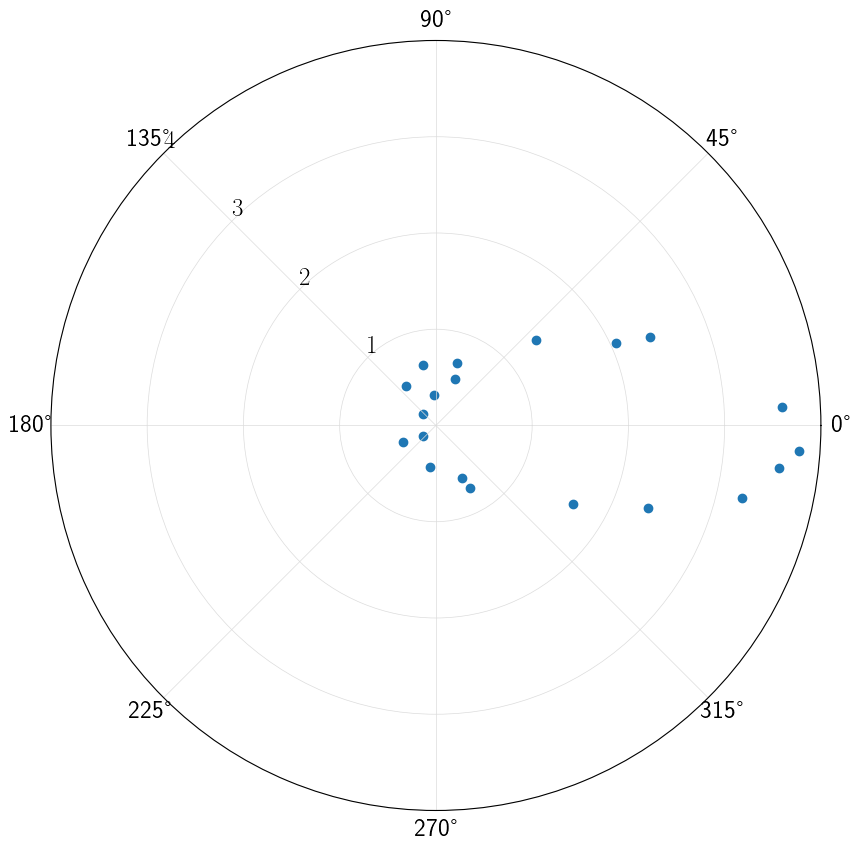

In [42]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, polar=True)
ax.scatter(theta, r)
ax.set_rmax(4)
ax.set_rticks([1, 2, 3, 4])  # Less radial ticks
ax.set_rlabel_position(135)  # Move radial labels away from plotted line
ax.grid(True, color='gainsboro', linestyle='-', linewidth=0.5)

### Computing the derivatives for the Jacobian

Using the Jacobian in this example is not strictly necessary, and only serves as an example. In some cases, providing an analytic function for the derivatives makes that `lmfit` does not need to use a numerical approximation, which can accelerate the convergence to the minimum.

$ r(\theta, a, e) = \frac{a (1-e^2)}{1-e\cos\theta}$ 

In [43]:
import sympy as sy

In [44]:
a = sy.Symbol('a')
e = sy.Symbol('e')
teta = sy.Symbol('theta')

Note that I already used `theta` for the angles of our dataset; hence my use of `teta` without an `h`.

Define the fit function. Beware: use sympy's cosine function, not numpy's cosine function.

In [45]:
def f(theta, a, e):
    return a * (1-e**2) / (1-e*sy.cos(teta))

In [46]:
sy.simplify(sy.diff(f(teta,a,e), a))

(e**2 - 1)/(e*cos(theta) - 1)

In [47]:
sy.simplify(sy.diff(f(teta,a,e), e))

a*(e**2*cos(theta) - 2*e + cos(theta))/(e*cos(theta) - 1)**2

### Fit the data using the nonlinear model

In [48]:
def f(theta, a, e):
    return a * (1-e**2) / (1 - e * np.cos(theta))

In [49]:
def jacobian(theta, a, e):
    deriv_a = (e**2-1)/(e*np.cos(theta)-1)
    deriv_e = a * (e**2 * np.cos(theta - 2*e + np.cos(theta))) / (e*np.cos(theta)-1)**2
    return np.array([deriv_a, deriv_b])

In [50]:
myModel = lmfit.Model(f, Dfun=jacobian, independent_vars=['theta'])

The `independent_vars` argument is not strictly necessary. `lmfit` assumes that the first argument of the fit function `f()` is the independent variable. If you want to change the order of the arguments, or if you have multiple independent variables, you do need to specify `independent_vars`.

In [51]:
myModel.set_param_hint('a', value=1)
myModel.set_param_hint('e', value=0.5, min=0.0, max=1.0)

In [52]:
myFit = myModel.fit(r, theta=theta)

In [53]:
myFit.success

True

In [54]:
print(myFit.fit_report())

[[Model]]
    Model(f)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 23
    # data points      = 20
    # variables        = 2
    chi-square         = 0.33535801
    reduced chi-square = 0.01863100
    Akaike info crit   = -77.7657780
    Bayesian info crit = -75.7743134
    R-squared          = 0.98919303
[[Variables]]
    a:  2.00014574 +/- 0.03767339 (1.88%) (init = 1)
    e:  0.89023045 +/- 0.00716733 (0.81%) (init = 0.5)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, e) = 0.535


To draw the best fit through our points, we define 300 angles and compute for each of them the fit function evaluated in our best fit estimates for $a$ and $e$.

In [55]:
angle = np.linspace(0.0, 2*np.pi, 300)
fittedValues = myModel.eval(theta=angle, params=myFit.params)

The (semi) $3\sigma$ confidence interval:

In [56]:
deltaCI = myFit.eval_uncertainty(theta=angle, sigma=3)              # fittedvalues +/- deltaCI is the confidence band

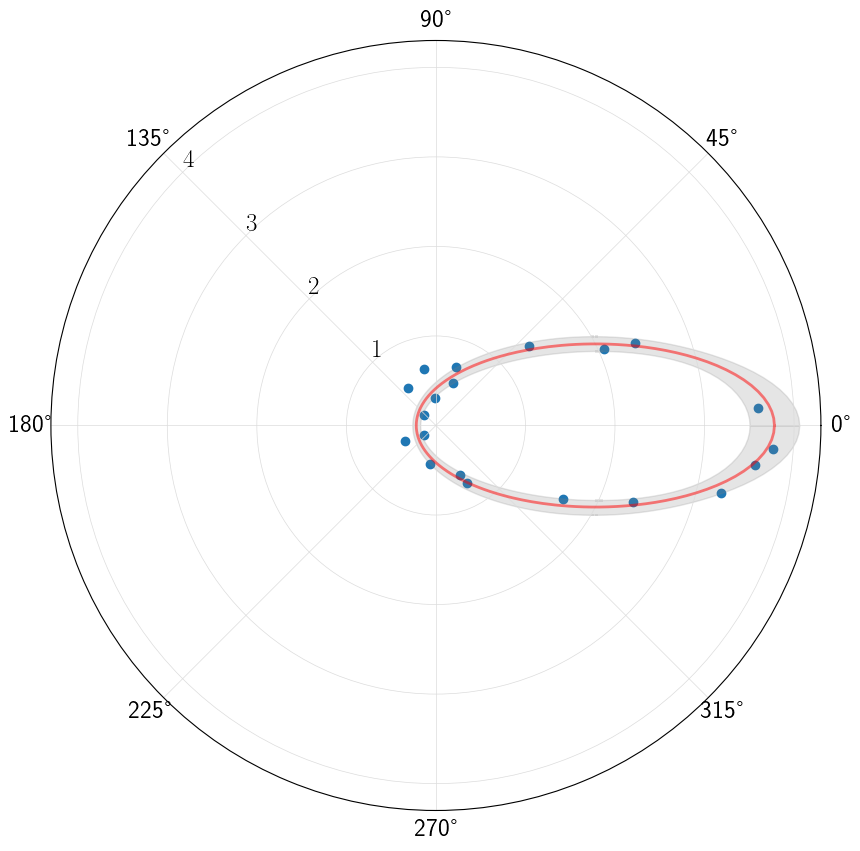

In [57]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, polar=True)
ax.scatter(theta, r)
ax.plot(angle, fittedValues, c='red', linewidth=2, alpha=0.5)
ax.fill_between(angle, fittedValues-deltaCI, fittedValues+deltaCI, color="grey", alpha=0.2)
ax.set_rmax(4.3)
ax.set_rticks([1, 2, 3, 4])                            # Less radial ticks than default
ax.set_rlabel_position(135.)                 # Move radial labels away from the data points
ax.grid(True, color='gainsboro', linestyle='-', linewidth=0.5)

***